In [1]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
from openmm import unit

# Double well potential

Our double well potential is described by the following expression:

$$
V(x,y,z)=E_{0}\left[ \left(\frac{x}{a}\right)^4 -2\left(\frac{x}{a}\right)^2 \right]-\frac{b}{a}x + \frac{1}{2}k\left( y^2 + z^2 \right)
$$ (potential)

This potential can be split in two summands, the first one with the potential for the $X$ axis, and a second term with the potential for the $Y$ and $Z$ axes:

$$
V(x,y,z)=V_{x}(x)+V_{y,z}(y,z)
$$ (potential-decomposed)

## A double well potential along $X$

The one dimensional potential $V_{x}(x)$ is a function of $x$ as well as three parameters: $E_{0}$, $a$, $b$.

$$
V_{x}(x)=E_{0}\left[ \left(\frac{x}{a}\right)^4 -2\left(\frac{x}{a}\right)^2 \right]-\frac{b}{a}x + \frac{1}{2}k\left( y^2 + z^2 \right)
$$ (x_potential)


Let's see the meaning of these constants. For this purpose the following method is defined to evaluate the contribution of the potential energy terms corresponding to the double well in $X$.

In [2]:
def double_well_potential_1D(x,Eo,a,b):
    return Eo*((x/a)**4-2*(x/a)**2)-(b/a)*x

### Symmetric case ($b=0$)

A symmetric double well potential can be represented by the former mathematical expression when $b=0$. In this situation, the double well minima are placed in $x=-a$ and $x=a$. And $E_{0}$ is the value of the barrier height (equal for both basins). Lets verify these statements with an example:

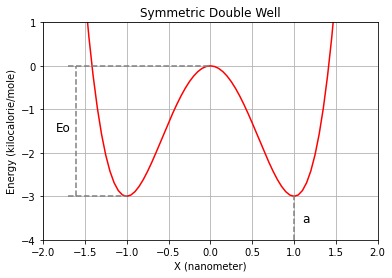

In [3]:
Eo=3.0 * unit.kilocalories_per_mole # barrier height when the double well is symmetric.
a=1.0 * unit.nanometers # Absolute value of the coordinates of minima (the potential is an even function).
b=0.0 * unit.kilocalories_per_mole # No need to explanation at this moment

x_serie = np.arange(-5., 5., 0.05) * unit.nanometers

plt.plot(x_serie, double_well_potential_1D(x_serie,Eo,a,b), 'r-')
plt.ylim(-4,1)
plt.xlim(-2,2)
plt.grid()
plt.xlabel("X ({})".format(unit.nanometers))
plt.ylabel("Energy ({})".format(unit.kilocalories_per_mole))
plt.title("Symmetric Double Well")

plt.hlines(-3, -1.7, -1, color='gray', linestyle='--')
plt.hlines(0, -1.7, 0, color='gray', linestyle='--')
plt.vlines(-1.6, -3, 0, color='gray', linestyle='--')
plt.vlines(1, -4, -3, color='gray', linestyle='--')
plt.text(-1.85, -1.5, 'Eo', fontsize=12)
plt.text(1.1, -3.6, 'a', fontsize=12)

plt.show()

You can play with the last cell, changing the $E_{0}$ and $a$ values, to check the consistency of their description. Or you can instead work with the first derivative of the potential to do the same analytically:

In [4]:
x, Eo, a = sy.symbols('x Eo a')
f = Eo*((x/a)**4-2*(x/a)**2)

g=sy.diff(f,x) # Primera derivada con respecto a x de la funcion f

In [5]:
g

Eo*(-4*x/a**2 + 4*x**3/a**4)

The first derivative can be factorized to unveil the value of its three roots: $x=0$, the barrier position, and $x=a$ y $x=-a$, the minima positions.

In [6]:
sy.factor(g)

4*Eo*x*(-a + x)*(a + x)/a**4

The height of the barrier, from the bottom of the basins to its top, can then be calculated:

$$
V_{x}(0)-V_{x}(c)=0-E_{0}\left[ 1-2 \right]=E_{0}
$$ (x_barrier)

#### Frequency of small oscillations around the minima

Now that the role of $E_{0}$ and $a$ is clear for the symmetric double well, we are interested in the frequency of the small oscillations at the energy minima. This frequency will be our time of reference to choose an appropriate integration time step of at the time of simulate the dynamics of a particle in this potential. This can be done attending to the second derivative of the potential.

The value of any mathematical function close enough to a minimum can be approximated by the value of the function at the minimum plus the resulting contribution of an harmonic potential. The stiffness of this harmonic potential is equal the to value of the second derivative of the function at the minimum. This is what is known as the Taylor expansion of any function (truncated in the third grade):

$$
f(x) \approx f(x_{0}) + f'(x_{0})(x-x_{0}) + \frac{1}{2} f''(x_{0})(x-x_{0})^{2}
$$ (taylor)

And by definition of minimum:

$$
f'(x_{0})=0
$$ (minimum_definition)

So:

$$
f(x) \approx f(x_{0}) + \frac{1}{2} f''(x_{0})(x-x_{0})^{2}
$$ (taylor_2)

At this point lets make a break to talk about the harmonic potential. We all know the hooks law to describe the force  suffered by a mass attached to an ideal spring around the equilibrium position:

$$
F(x) = -k(x-x_{0})
$$ (hook)

Where $k$ is the stiffness of the spring and $x_{0}$ is the equilibrium position. The potential energy $V(x)$ is now deduced given that:

$$
F(x) = -\frac{d V(x)}{dx}
$$ (grad_potential)

So, the spring force is the result of the first harmonic potential derivative:

$$
V(x) = \frac{1}{2} k (x-x_{0})^{2}
$$ (x_potential_2)

And the frequency of oscillation of the spring, or a particle goberned by the former potential, is:

$$
\omega = \sqrt{\frac{k}{m}}
$$ (omega)

Where $m$ is the mass of the particle. This way the potential can also be written as:

$$
V(x) = \frac{1}{2} k (x-x_{0})^{2} = \frac{1}{2} m \omega^{2} (x-x_{0})^{2}
$$ (potential_omega)

Now, going back to our Taylor expansion of any mathematical function $f(x)$. If the shape of the $f(x)$ around a minimum $x_{0}$ can be approximated with an harmonic potential, this means that the characteristic frequency $\omega$ of the oscillations around the near surroundings of the minimum is -by comparison with the potential behind the Hooke's law-:

$$
\omega = \sqrt{\frac{f''(x_{0})}{m}}
$$ (omega_2)

This way the frequency of the small oscillations of a particle with mass $m$ around a minimum can then by obtained from the value of the second derivative at the minimum:

In [ ]:
x, Eo, a = sy.symbols('x Eo a')
f = Eo*((x/a)**4-2*(x/a)**2)

gg=sy.diff(f,x,x) # Second derivative of f with respect x

gg

Let's look at the minimum at $x=a$:

In [ ]:
gg.subs({x:a})

In this case the frequency of the oscillations of a particle with mass $m$ is:

$$
\omega = \sqrt{\frac{8E_{0}}{ma^{2}}}
$$ (omega_example)

And the period is:

$$
T = \frac{2\pi}{\omega} = 2\pi \sqrt{\frac{ma^{2}}{8E_{0}}}
$$ (period_example)

We can see graphically how the Taylor expansion is a good aproximation when close enough to a minimum:

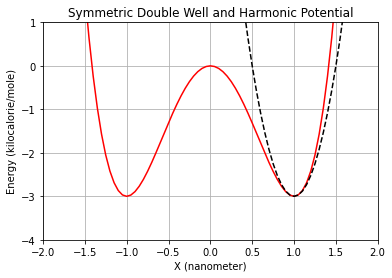

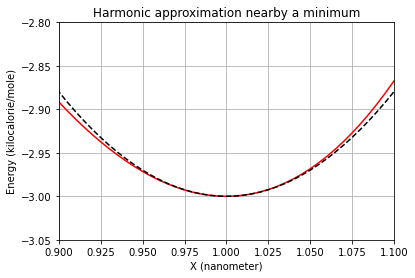

In [7]:
def harmonic_well_potential_1D(x,k,a,Eo):
    return 0.5*k*(x-a)**2-Eo

Eo=3.0 * unit.kilocalories_per_mole # barrier height when the double well is symmetric.
a=1.0 * unit.nanometers # Absolute value of the coordinates of minima (the potential is an even function).
b=0.0 * unit.kilocalories_per_mole # No need to explanation at this moment
k=(8*Eo)/a**2 # harmonic stiffness

x_serie = np.arange(-5., 5., 0.05) * unit.nanometers

plt.plot(x_serie, double_well_potential_1D(x_serie,Eo,a,b), 'r-')
plt.plot(x_serie, harmonic_well_potential_1D(x_serie,k,a,Eo), color='k', linestyle='--')
plt.ylim(-4,1)
plt.xlim(-2,2)
plt.grid()
plt.xlabel("X ({})".format(unit.nanometers))
plt.ylabel("Energy ({})".format(unit.kilocalories_per_mole))
plt.title("Symmetric Double Well and Harmonic Potential")
plt.show()

x_serie = np.arange(-0.5, 1.5, 0.005) * unit.nanometers

plt.plot(x_serie, double_well_potential_1D(x_serie,Eo,a,b), 'r-')
plt.plot(x_serie, harmonic_well_potential_1D(x_serie,k,a,Eo), color='k', linestyle='--')
plt.ylim(-3.05,-2.8)
plt.xlim(0.9,1.1)
plt.grid()
plt.xlabel("X ({})".format(unit.nanometers))
plt.ylabel("Energy ({})".format(unit.kilocalories_per_mole))
plt.title("Harmonic approximation nearby a minimum")
plt.show()

### Assymetric case ($b\neq0$)

In the case of $b\neq 0$, our double well turns in to an assymetric potential. In this situation $E_{0}$ and $a$ have **approximately** the same interpretation, and $b$ can be **approximately** understood as the amount energy that basins shift up or down, depending on the relative position to $x=0$. In our double well, the left basin raises and the right basin drops when $b>0$. Lets see this in a plot:

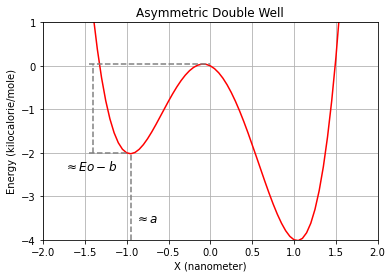

In [8]:
Eo=3.0 * unit.kilocalories_per_mole # barrier height when the double well is symmetric.
a=1.0 * unit.nanometers # Absolute value of the coordinates of minima (the potential is an even function).
b=1.0 * unit.kilocalories_per_mole # vertical shift of basins (approx.)

x_serie = np.arange(-5., 5., 0.05) * unit.nanometers

plt.plot(x_serie, double_well_potential_1D(x_serie,Eo,a,b), 'r-')
plt.ylim(-4,1)
plt.xlim(-2,2)
plt.grid()
plt.xlabel("X ({})".format(unit.nanometers))
plt.ylabel("Energy ({})".format(unit.kilocalories_per_mole))
plt.title("Asymmetric Double Well")

plt.hlines(-2, -1.45, -1, color='gray', linestyle='--')
plt.hlines(0.05, -1.45, 0, color='gray', linestyle='--')
plt.vlines(-1.4, -2, 0.05, color='gray', linestyle='--')
plt.vlines(-0.95, -4, -2, color='gray', linestyle='--')
plt.text(-1.75, -2.4, r'$\approx Eo-b$', fontsize=12)
plt.text(-0.9, -3.6, r'$\approx a$', fontsize=12)

plt.show()

The value of the energy barrier from the left minimum is $\approx E_{0}+b$, while $\approx E_{0}-b$ accounts for the barrier from the right minimum.

### Frequency of small oscillations around the minima.

Given that $b$ is included as a linear factor in the potential, its effect vanishes in the second derivative. As such, the harmonic approximation described for the symmetric double well is exact also for this case. But notice that the positions of the minima, and the position of the barrier, are slightly shifted with respect to those for the symmetric double well.

## An harmonic potential along $Y$ and $Z$

The behaviour of a particle in the double well potential along $X$ is independent of what happens along $Y$ and $Z$. We could keep the three dimensional potential equal to $V_{x}(x)$, but in this case the particle would diffuse freely in the subspace $Y-Z$. To avoid these, for aesthetic purposes only, let's add an harmonic well in those two axes:

$$
V_{yz}(y,z)= \frac{1}{2}k\left( y^2 + z^2 \right)
$$ (xy_potential)

The value of the elastic constant $k$ should be lower, or at least equal, to the harmonic approximation of $V_{x}(x)$ around the minima. Otherwise we should be aware of $V_{yz}$ limiting the integration time step. It's then suggested that:

$$
k\le \frac{8E_{0}}{a^2}
$$ (k_limit)